In [21]:
# IV for a single dot

import numpy as np
import imp
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.expanduser('~/quantum-ml/nanowire_model'))

import potential_profile
import markov
imp.reload(markov)
import thomas_fermi
imp.reload(thomas_fermi)
import tunneling
imp.reload(tunneling)
import exceptions

def get_dot_current_and_charge(physics_model,graph_model,tf_strategy):
    
    try:
        graph = markov.Markov(graph_model,physics_model,tf_strategy)
        graph.generate_graph()

        current = graph.get_current()
        charge_state = graph.get_charge_state()

        del graph
    except exceptions.InvalidChargeState:
        current = 0
        # no dot
        charge_state = (0)
    
    return current,charge_state

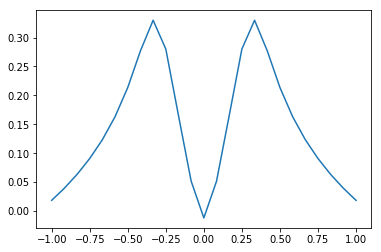

In [29]:
# physical parameters
E_scale = 'eV'
dx_scale = '1e-9'

kT = 1000e-6
b1 = (-200e-3,-0.31,0.1,1)
d = (200e-3,0.0,0.1,1)
b2 = (-200e-3,0.31,0.1,1)

x = np.linspace(-1,1,25)
V = potential_profile.V_x_wire(x,[b1,d,b2])

K_onsite = 10e-3
sigma = x[1] - x[0]
x_0 = (x[1] - x[0])
mu_l = (100.0e-3,100.1e-3)
battery_weight = 100

physics_model = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)

# graph parameters
graph_model = (10,1)

tf_strategy = 'simple'

plt.plot(x,V)

In [37]:
# K_sweep
K_vec = np.linspace(5e-3,10e-3,100)
V_d_vec = np.linspace(250e-3,300e-3,100)

I_vec = np.zeros((len(K_vec),len(V_d_vec)))
charge_state_vec = np.zeros((len(K_vec),len(V_d_vec)))
for j in range(len(K_vec)):
    if j % 10 == 0:
       print(j)                     
    K_onsite = K_vec[j]
    # V_d sweep
    for i in range(len(V_d_vec)):
        d = (V_d_vec[i],0.0,0.1,1)
        V = potential_profile.V_x_wire(x,[b1,d,b2])
        
        physics_model = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)

        I,charge_state = get_dot_current_and_charge(physics_model,graph_model,tf_strategy)
        I_vec[j,i] = I
        charge_state_vec[j,i] = charge_state[0]


0
10
20
30
40
50
60
70
80
90


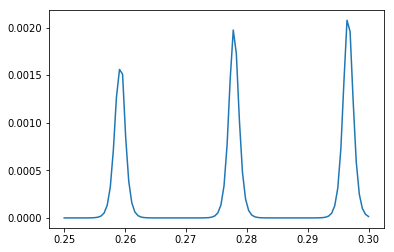

In [31]:
plt.plot(V_d_vec,I_vec)

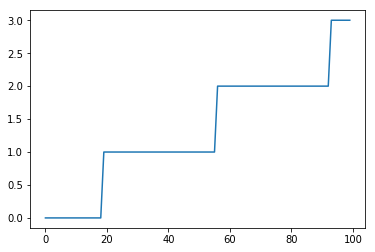

In [32]:
plt.plot(charge_state_vec)

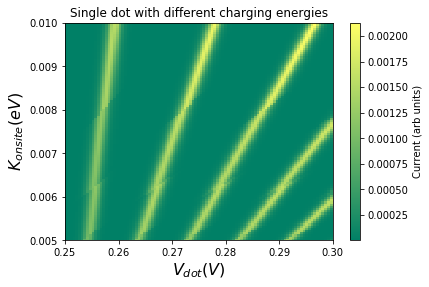

In [64]:
XX,YY = np.meshgrid(V_d_vec,K_vec)
plt.pcolor(XX,YY,I_vec,cmap="summer")
cbar = plt.colorbar()
plt.xlabel(r'$V_{dot} (V)$',fontsize=16)
plt.ylabel(r'$K_{onsite} (eV)$',fontsize=16)
cbar.set_label('Current (arb units)')
plt.title('Single dot with different charging energies')

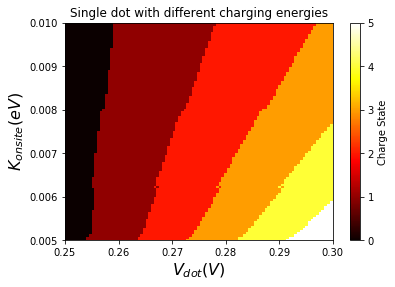

In [62]:
XX,YY = np.meshgrid(V_d_vec,K_vec)
plt.pcolor(XX,YY,charge_state_vec,cmap="hot")
cbar = plt.colorbar()
plt.xlabel(r'$V_{dot} (V)$',fontsize=16)
plt.ylabel(r'$K_{onsite} (eV)$',fontsize=16)
cbar.set_label('Charge State')
plt.title('Single dot with different charging energies')

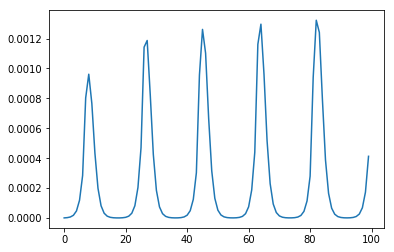

In [68]:
data = np.zeros((len(K_vec),3*len(V_d_vec)))
N = len(V_d_vec)
for i in range(len(K_vec)):
    data[i] = np.concatenate((V_d_vec,I_vec[i,:],charge_state_vec[i]))
np.savetxt(os.path.expanduser('~/quantum-ml/data/var_K_I_V.txt'),data)